In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_dataset = train_datagen.flow_from_directory('./dataset/train',
                                                  target_size=(200, 200),
                                                  class_mode='categorical', 
                                                  color_mode='grayscale', 
                                                  batch_size=100,
                                                  )

test_dataset = test_datagen.flow_from_directory('./dataset/test',
                                                target_size=(200, 200),
                                                class_mode='categorical',
                                                color_mode='grayscale',
                                                batch_size=100,
                                                shuffle=False
                                                )

valid_dataset = valid_datagen.flow_from_directory('./dataset/val',
                                                  target_size=(200, 200),
                                                  class_mode='categorical',
                                                  color_mode='grayscale',
                                                  batch_size=100,
                                                  )


Found 11200 images belonging to 4 classes.
Found 626 images belonging to 4 classes.
Found 620 images belonging to 4 classes.


In [8]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=train_dataset.image_shape))
model.add(MaxPool2D(2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Flatten())

model.add(Dense(512, activation='relu'))


model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [9]:
import keras
METRICS = [
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall')
    ]
    
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=METRICS)

In [10]:
Info = model.fit(
                 train_dataset,
                 validation_data=valid_dataset,
                 epochs=5,
                 )

Epoch 1/5
112/112 [==============================] - 286s 3s/step - loss: 1.1120 - accuracy: 0.5505 - precision: 0.6489 - recall: 0.3400 - val_loss: 0.8063 - val_accuracy: 0.6661 - val_precision: 0.7346 - val_recall: 0.6161
Epoch 2/5
112/112 [==============================] - 249s 2s/step - loss: 0.6447 - accuracy: 0.7491 - precision: 0.7939 - recall: 0.6978 - val_loss: 0.2694 - val_accuracy: 0.9258 - val_precision: 0.9444 - val_recall: 0.9048
Epoch 3/5
112/112 [==============================] - 241s 2s/step - loss: 0.2082 - accuracy: 0.9303 - precision: 0.9369 - recall: 0.9246 - val_loss: 0.0370 - val_accuracy: 0.9887 - val_precision: 0.9887 - val_recall: 0.9887
Epoch 4/5
112/112 [==============================] - 230s 2s/step - loss: 0.0935 - accuracy: 0.9713 - precision: 0.9730 - recall: 0.9707 - val_loss: 0.0052 - val_accuracy: 0.9984 - val_precision: 0.9984 - val_recall: 0.9984
Epoch 5/5
112/112 [==============================] - 221s 2s/step - loss: 0.0688 - accuracy: 0.9827 - pr

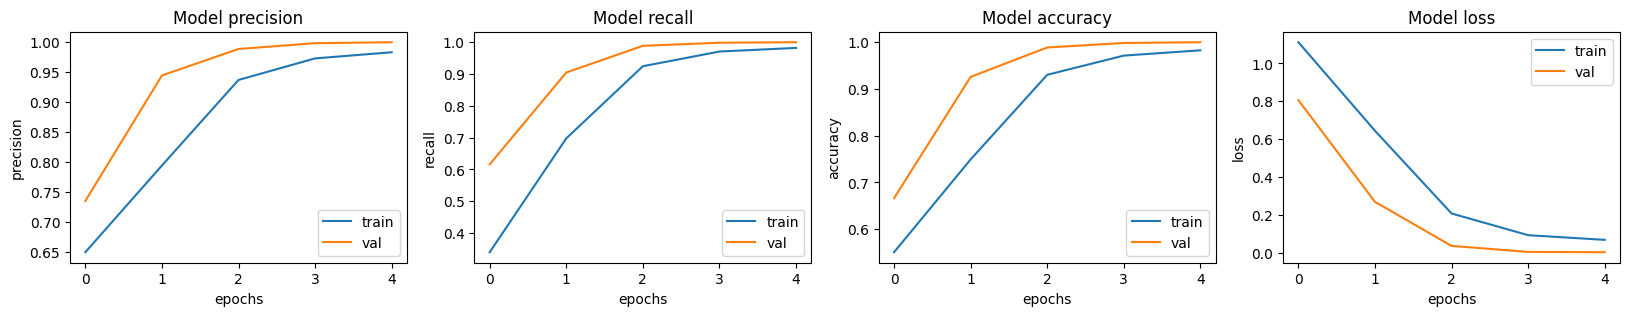

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(Info.history[met])
    ax[i].plot(Info.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [12]:
predictions = model.predict(test_dataset)

7/7 [==============================] - 6s 869ms/step


In [13]:
diseases_labels = []

for key, value in train_dataset.class_indices.items():
   diseases_labels.append(key)

In [14]:
def evaluate(actual, predictions):
  pre = []
  for i in predictions:
    pre.append(np.argmax(i))

  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(20,20))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
  plt.show()

Accuracy: 0.9968051118210862
Precision: 0.9980544747081712
Recall: 0.9942546583850932
F1_score: 0.9961331732921523


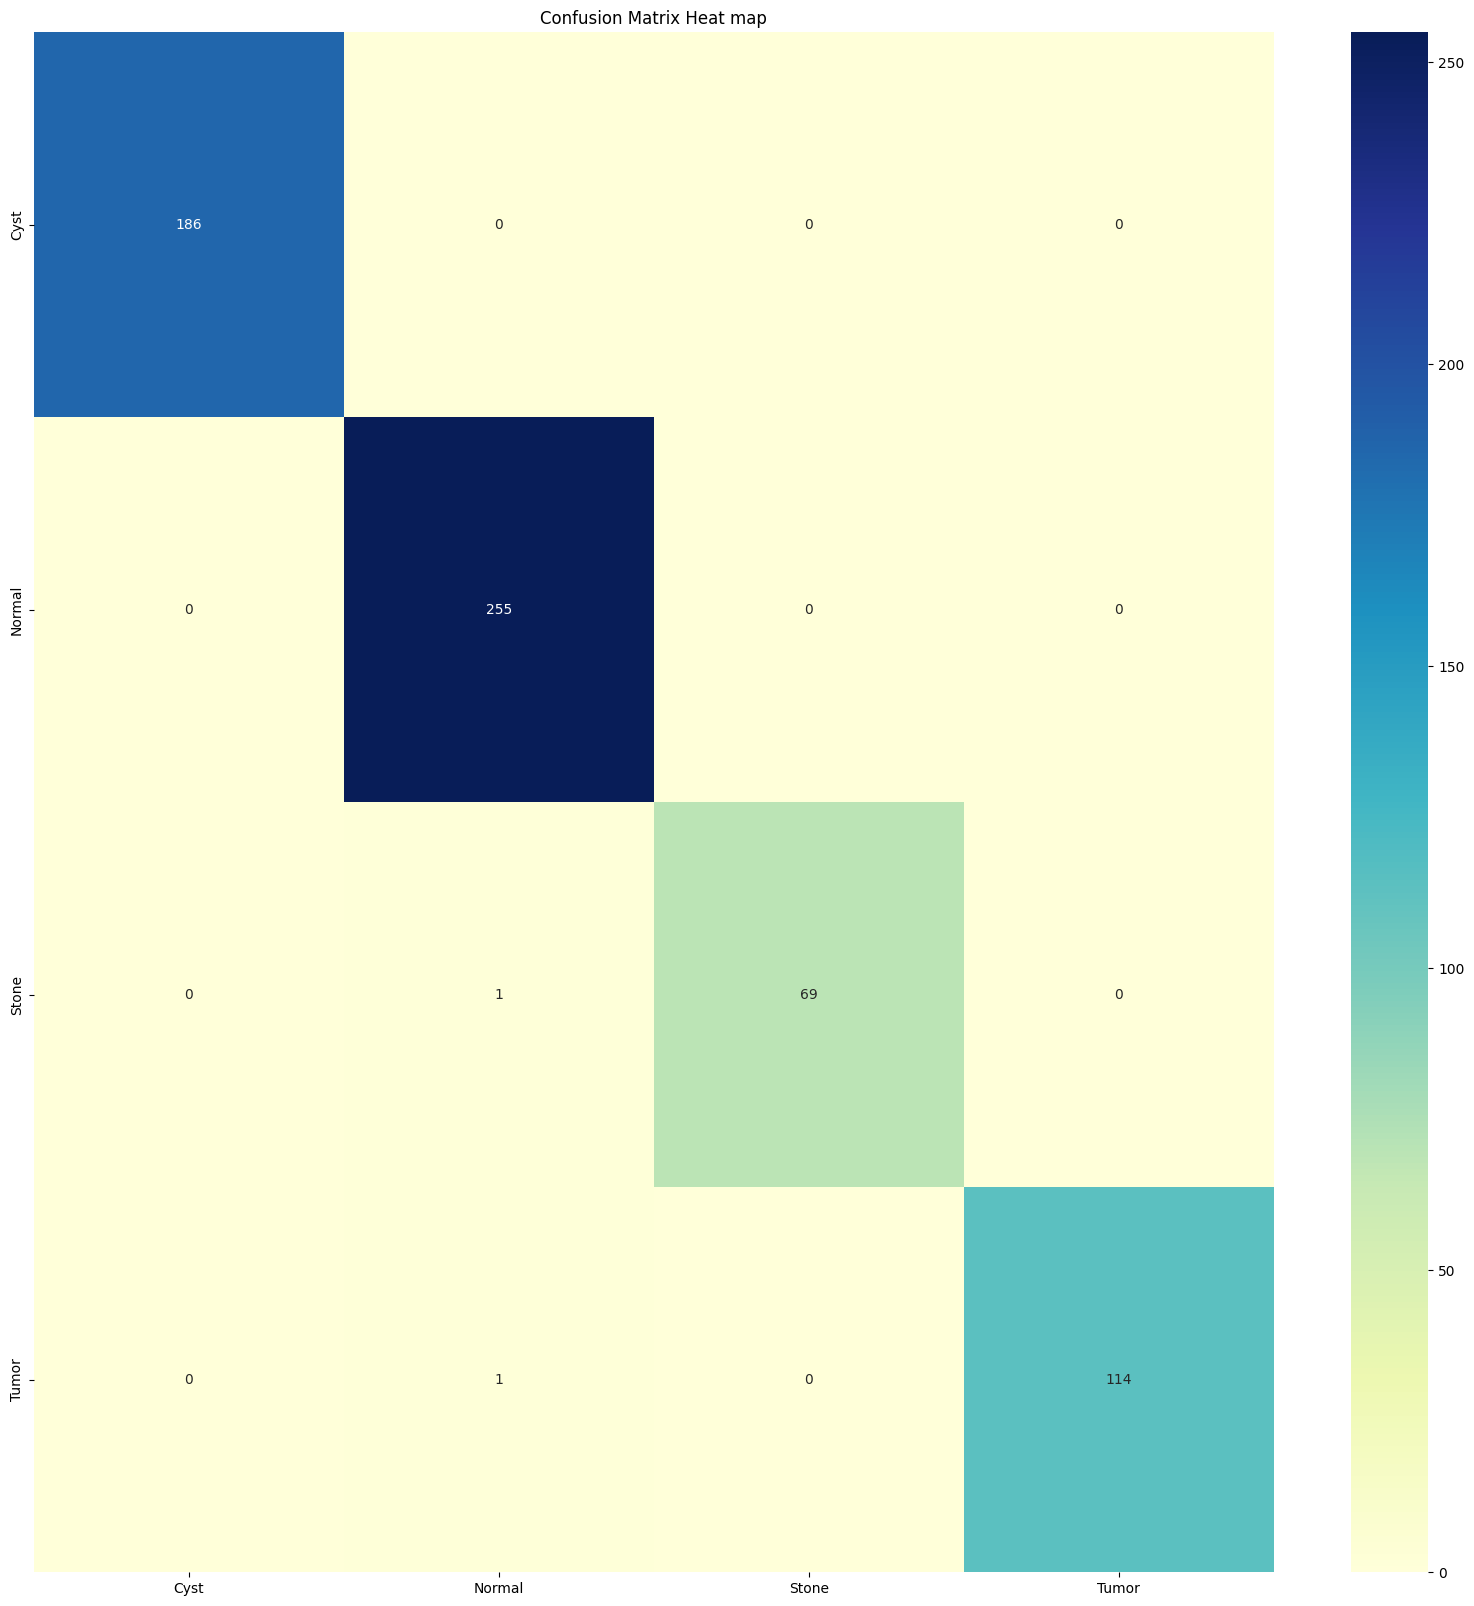

In [15]:
evaluate(test_dataset.classes,predictions)

In [16]:
model.evaluate(test_dataset)

7/7 [==============================] - 4s 486ms/step - loss: 0.0088 - accuracy: 0.9968 - precision: 0.9968 - recall: 0.9968


[0.008833974599838257,
 0.9968051314353943,
 0.9968051314353943,
 0.9968051314353943]

In [17]:
model.save('kidney_stone_classifier.h5')

In [18]:
predictions

array([[9.9999607e-01, 3.1288604e-11, 3.1969366e-06, 7.6062901e-07],
       [9.9987149e-01, 3.9299646e-08, 1.2513014e-04, 3.3227932e-06],
       [9.9989569e-01, 7.2832627e-08, 8.1657752e-05, 2.2593902e-05],
       ...,
       [1.8869375e-09, 2.8119914e-04, 1.5757288e-06, 9.9971718e-01],
       [3.7153831e-03, 1.0228906e-04, 2.8758061e-05, 9.9615365e-01],
       [1.4722784e-03, 4.3340791e-05, 1.0106924e-05, 9.9847430e-01]],
      dtype=float32)